# Discrete analysis: Number of quantiles

In [1]:
# config cell
from pathlib import Path
import xarray as xr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dask.distributed import Client

# for reloading the baeda module which is actively developing
import baeda
from baeda import projected_coords, tmp_era5_discrete_idx_fp

coords = projected_coords

zarr_dir = Path("/center1/CMIP6/kmredilla/cmip6_4km_downscaling/cmip6_zarr")
era5_dir = Path("/center1/CMIP6/kmredilla/cmip6_4km_downscaling/era5_zarr")
tmp_dir = Path("/center1/CMIP6/kmredilla/downscaling/eda")

# models and scenarios to test
models = ["GFDL-ESM4", "EC-Earth3-Veg", "NorESM2-MM"]
scenarios = ["ssp245", "ssp585"]
var_ids = ["tasmax", "pr"]

# this will be a dict for capturing all relevant results from each adjustment for later summarization
results = {}
for model in models + ["ERA5"]:
    results[model] = {}
    for var_id in var_ids:
        results[model][var_id] = {}

In [2]:
# Load the precomputed ERA5 indicators:
for var_id in var_ids:
    # save the indicators to a file
    results["ERA5"][var_id]["indicators"] = xr.open_zarr(
        tmp_dir.joinpath(tmp_era5_discrete_idx_fp.format(var_id=var_id))
    ).load()

In [3]:
# load ERA5

client = Client()

# we are loading both precip and temp to choose some locations based on extremes in these variables
era5_stores = {
    "t2max": era5_dir.joinpath("t2max_era5.zarr"),
    "pr": era5_dir.joinpath("pr_era5.zarr"),
}

era5_ds = baeda.open_era5_dataset(era5_stores)

era5_extr = baeda.extract_era5_time_series(
    era5_ds, coords
).load()  # loading to help keep future graph sizes down

/home/kmredilla/miniconda3/envs/cmip6-utils/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33973 instead
  warnings.warn(


In [4]:
model = "GFDL-ESM4"
scenario = "ssp245"
var_id = "tasmax"


hist_extr, sim_extr = baeda.extract_time_series_from_zarr(
    zarr_dir, model, scenario, var_id, coords
)
_ = hist_extr.load()
results = baeda.run_quantile_profile_adjustment_and_summarize(
    hist_extr, era5_extr, results
)

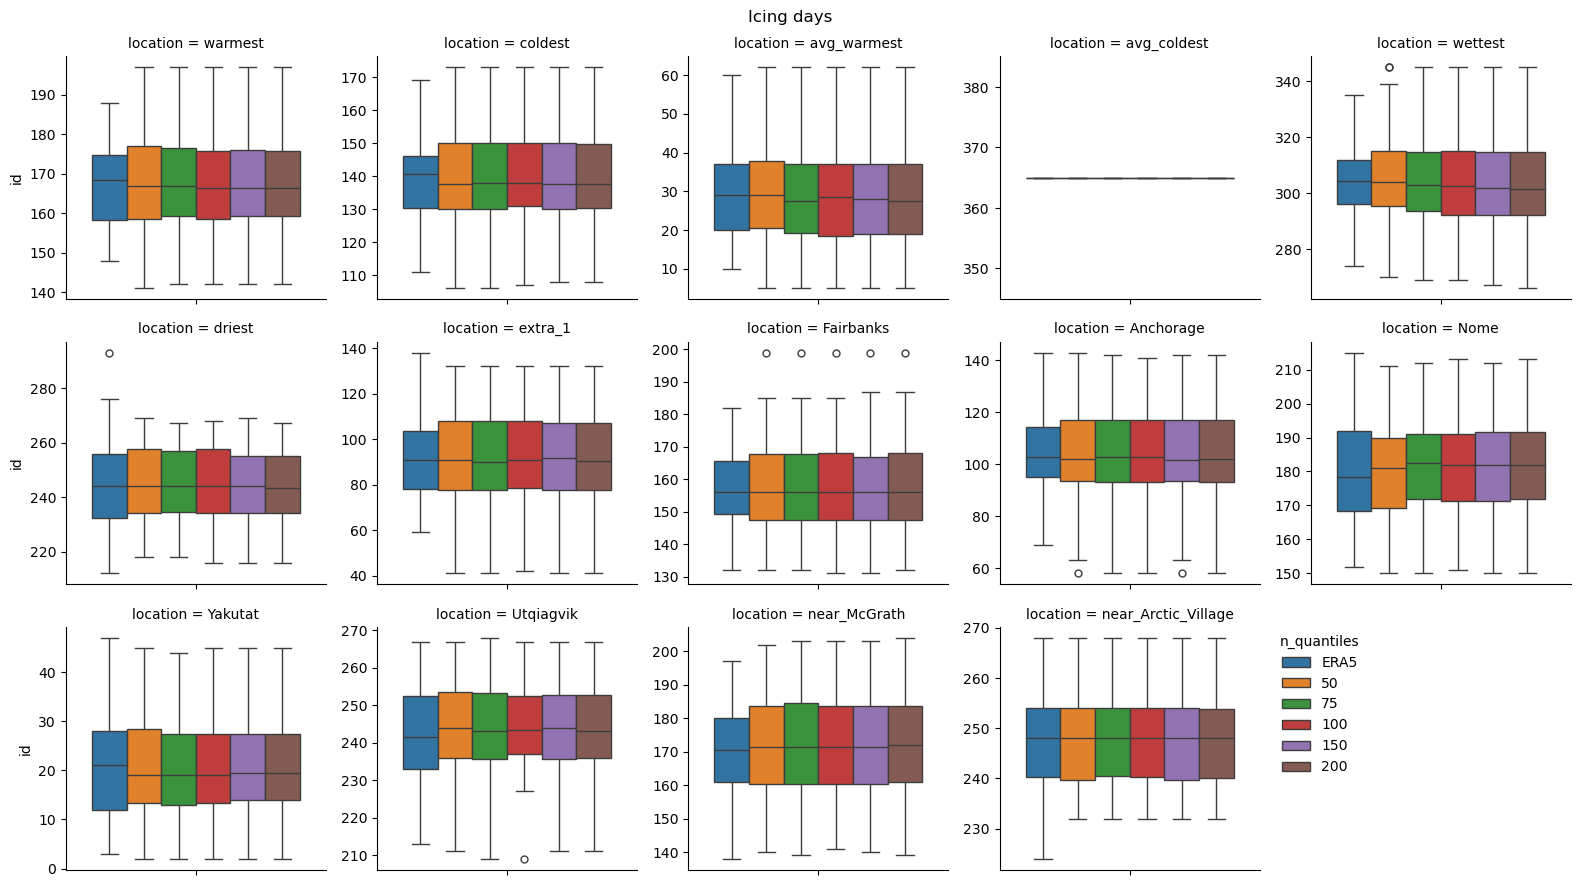

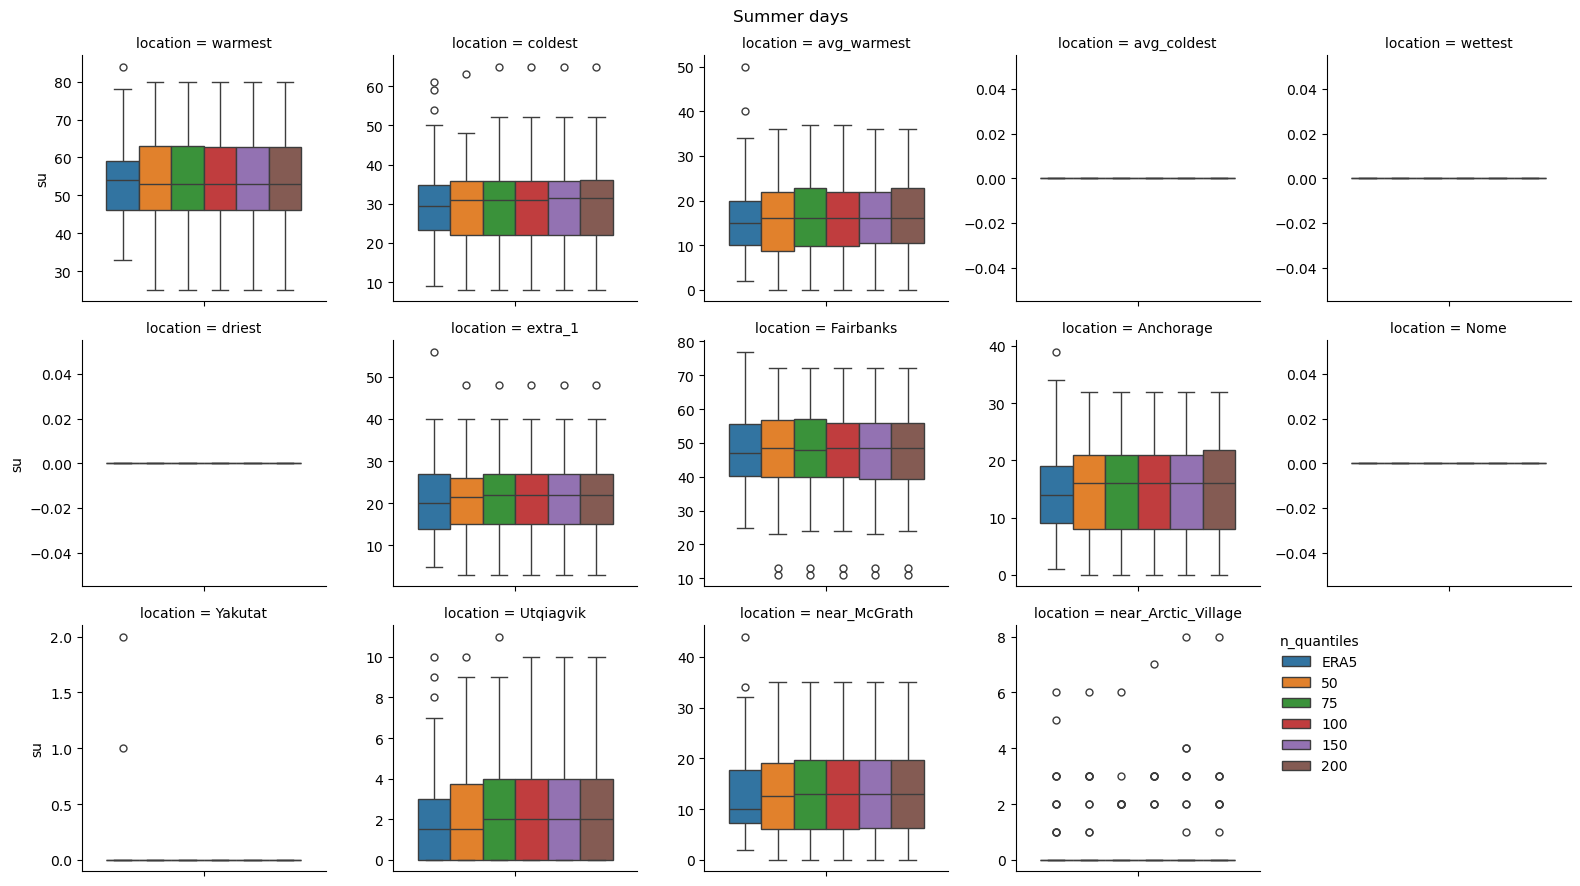

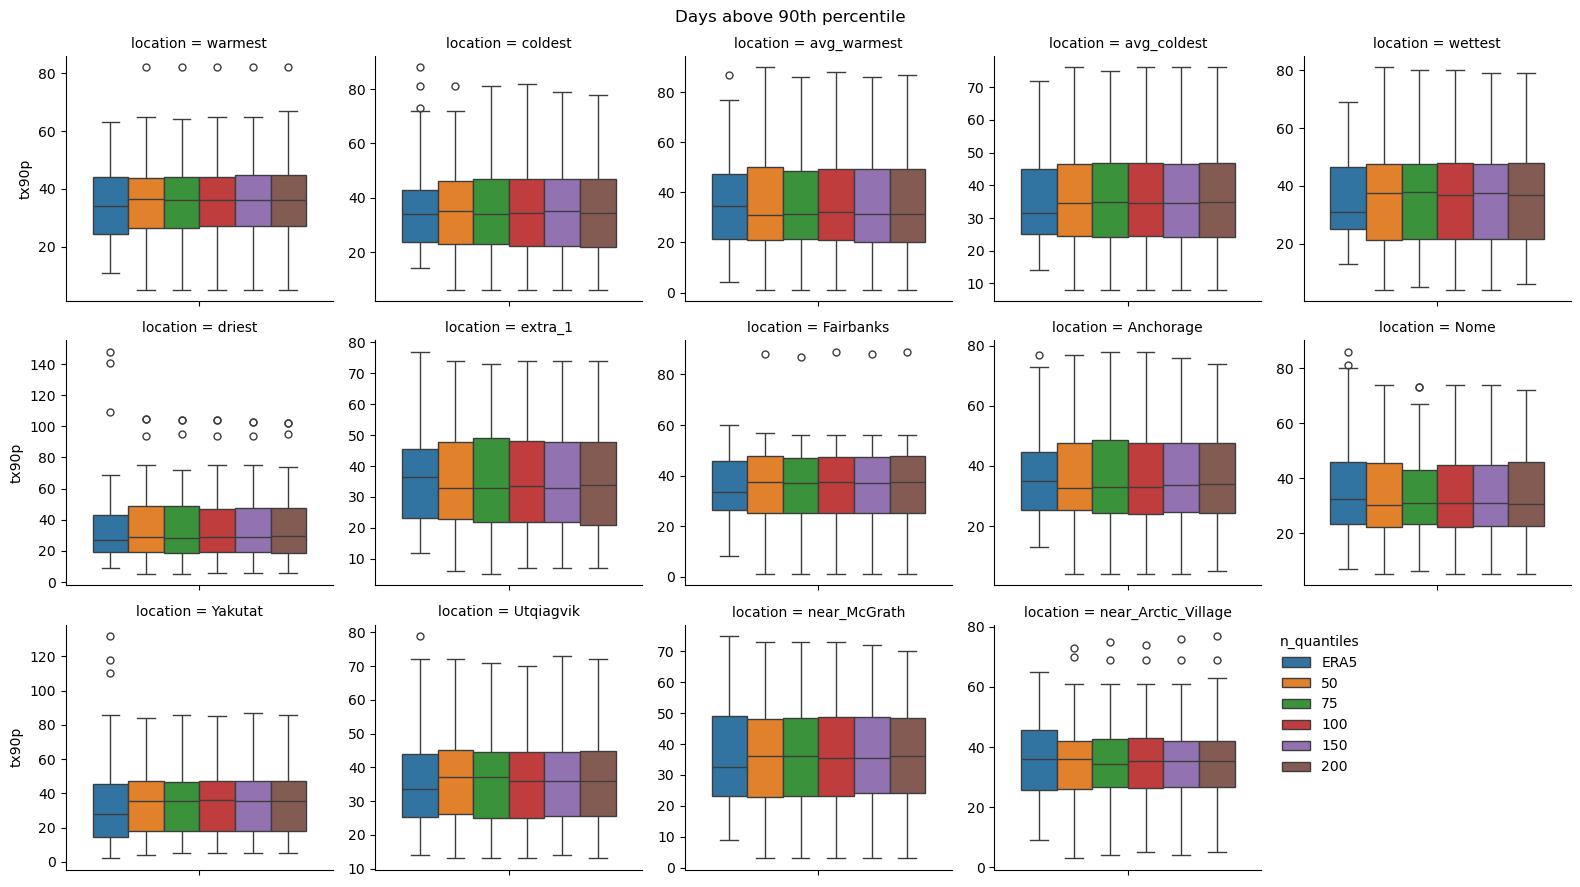

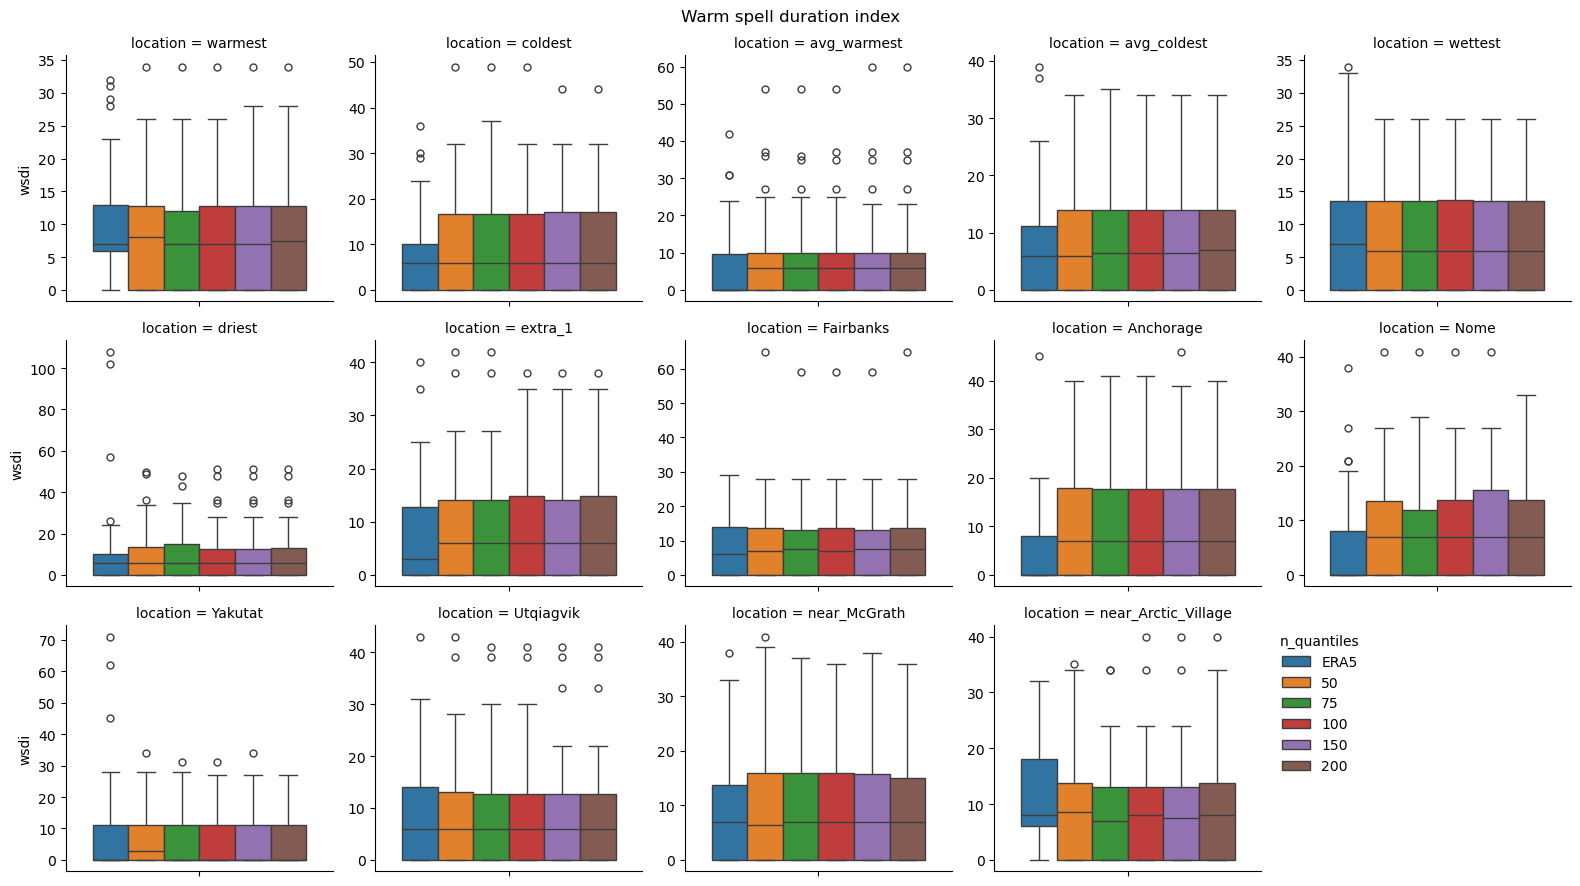

In [13]:
indicator_ds = results[model][var_id]["qdm_quantiles"]["indicators"]["historical"]
for indicator in indicator_ds.data_vars:
    baeda.indicator_boxplot_by_location(indicator_ds, indicator, hue="n_quantiles")

In [14]:
model = "GFDL-ESM4"
scenario = "ssp245"
var_id = "pr"


hist_extr, sim_extr = baeda.extract_time_series_from_zarr(
    zarr_dir, model, scenario, var_id, coords
)
_ = hist_extr.load()
results = baeda.run_quantile_profile_adjustment_and_summarize(
    hist_extr, era5_extr, results
)

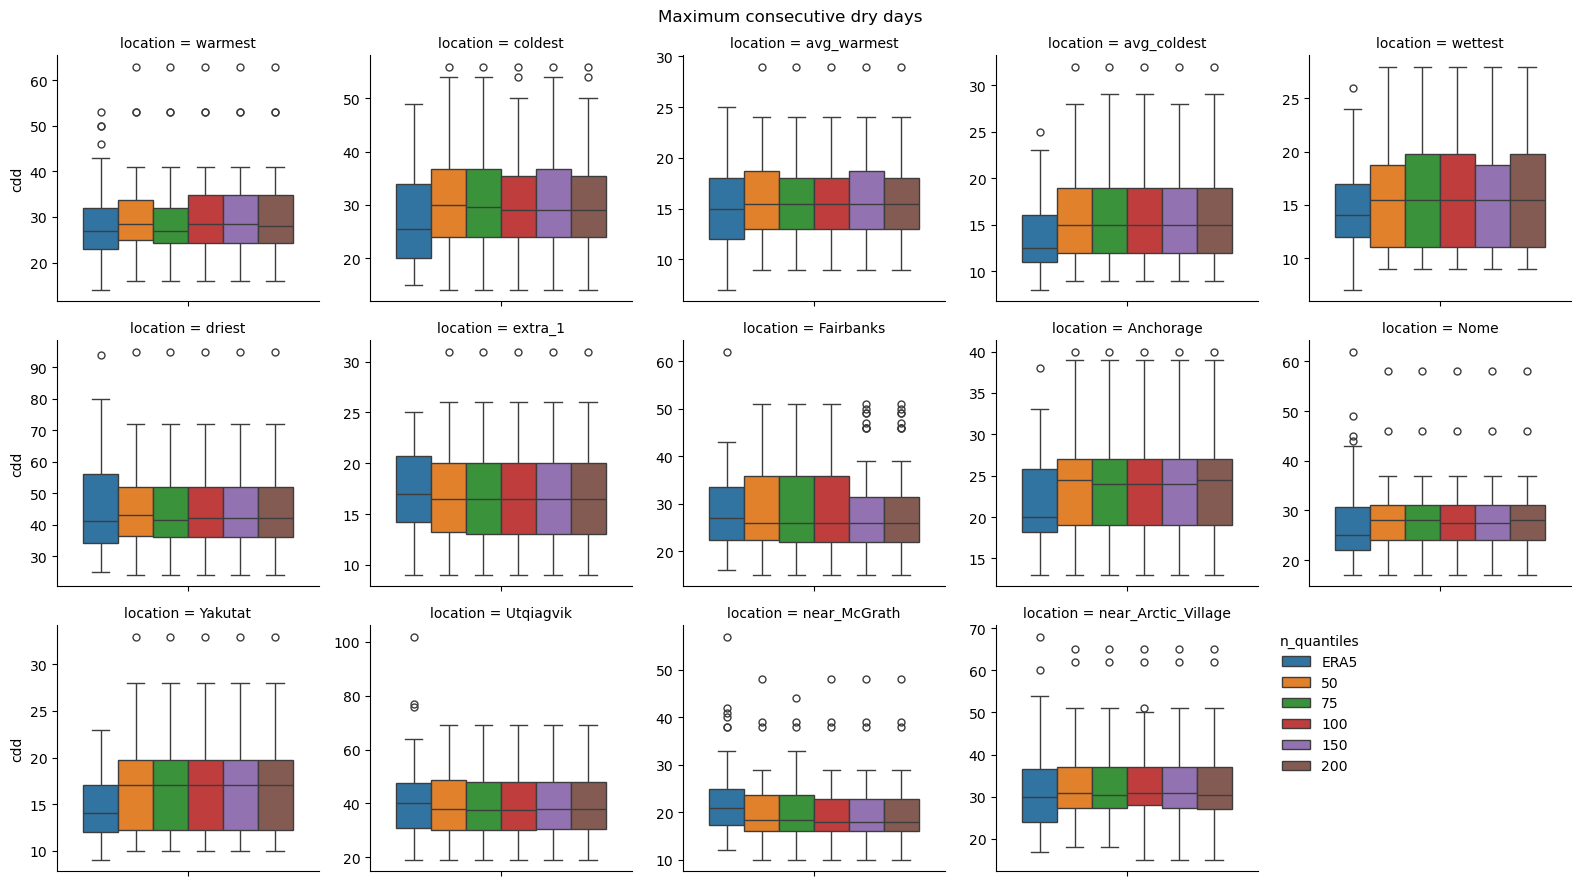

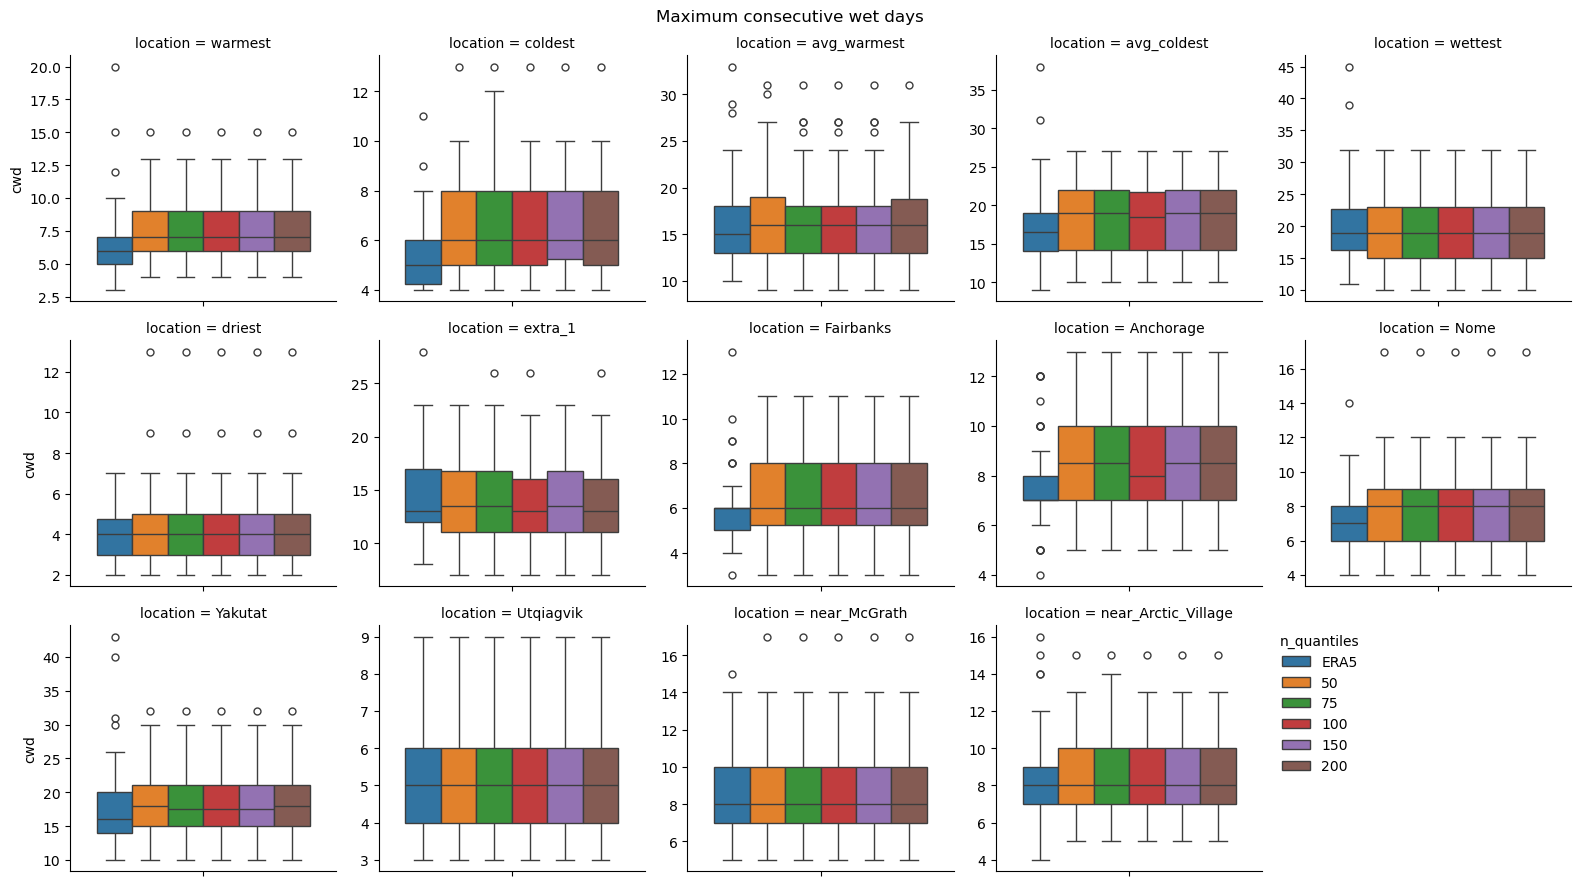

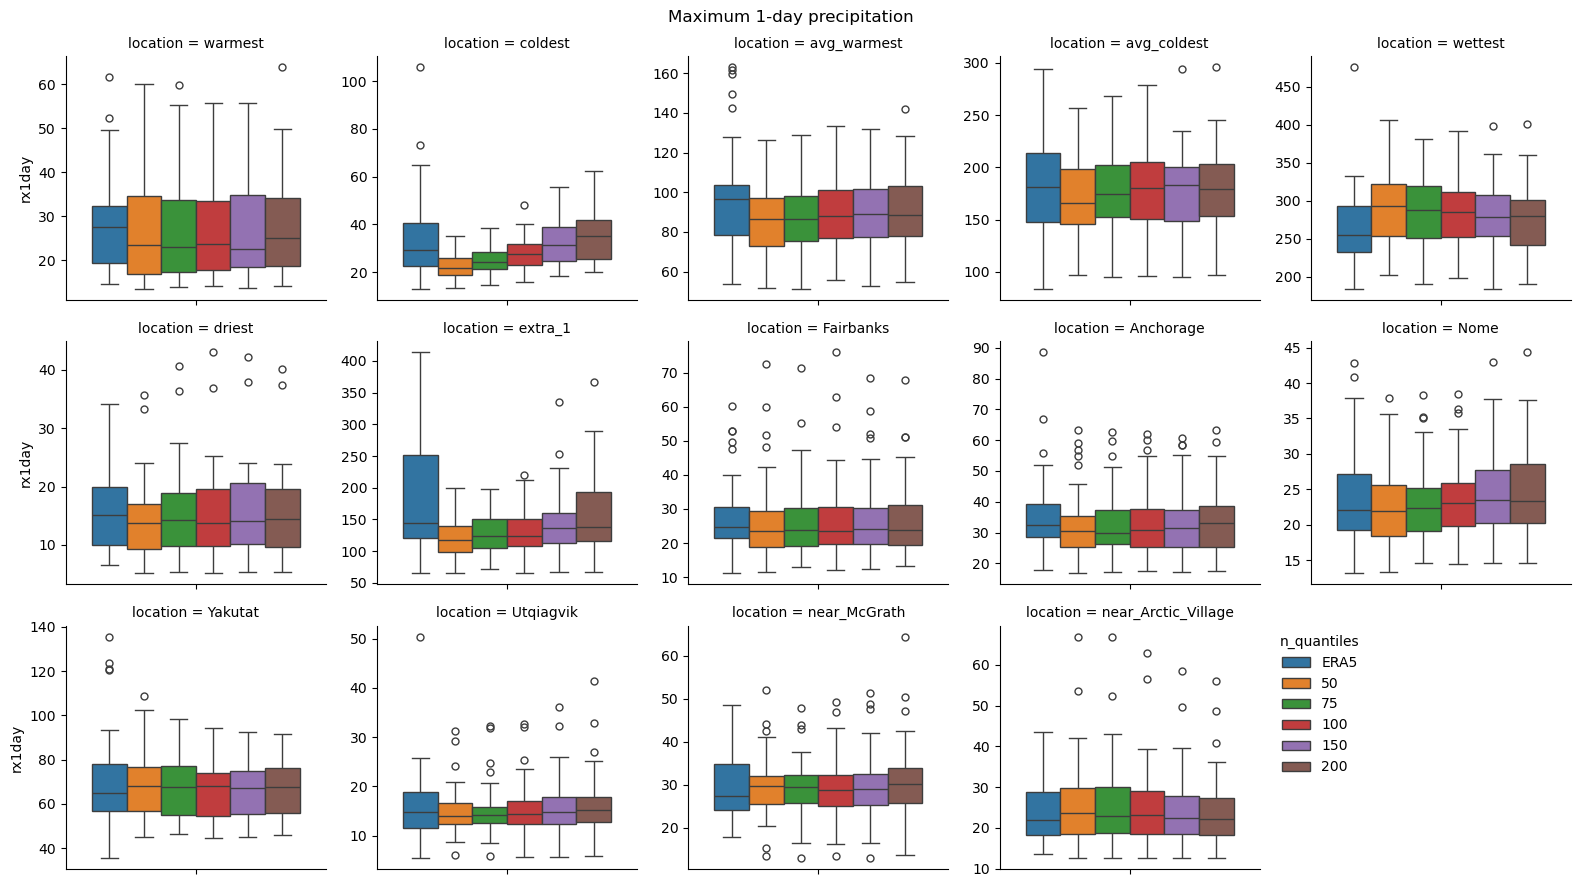

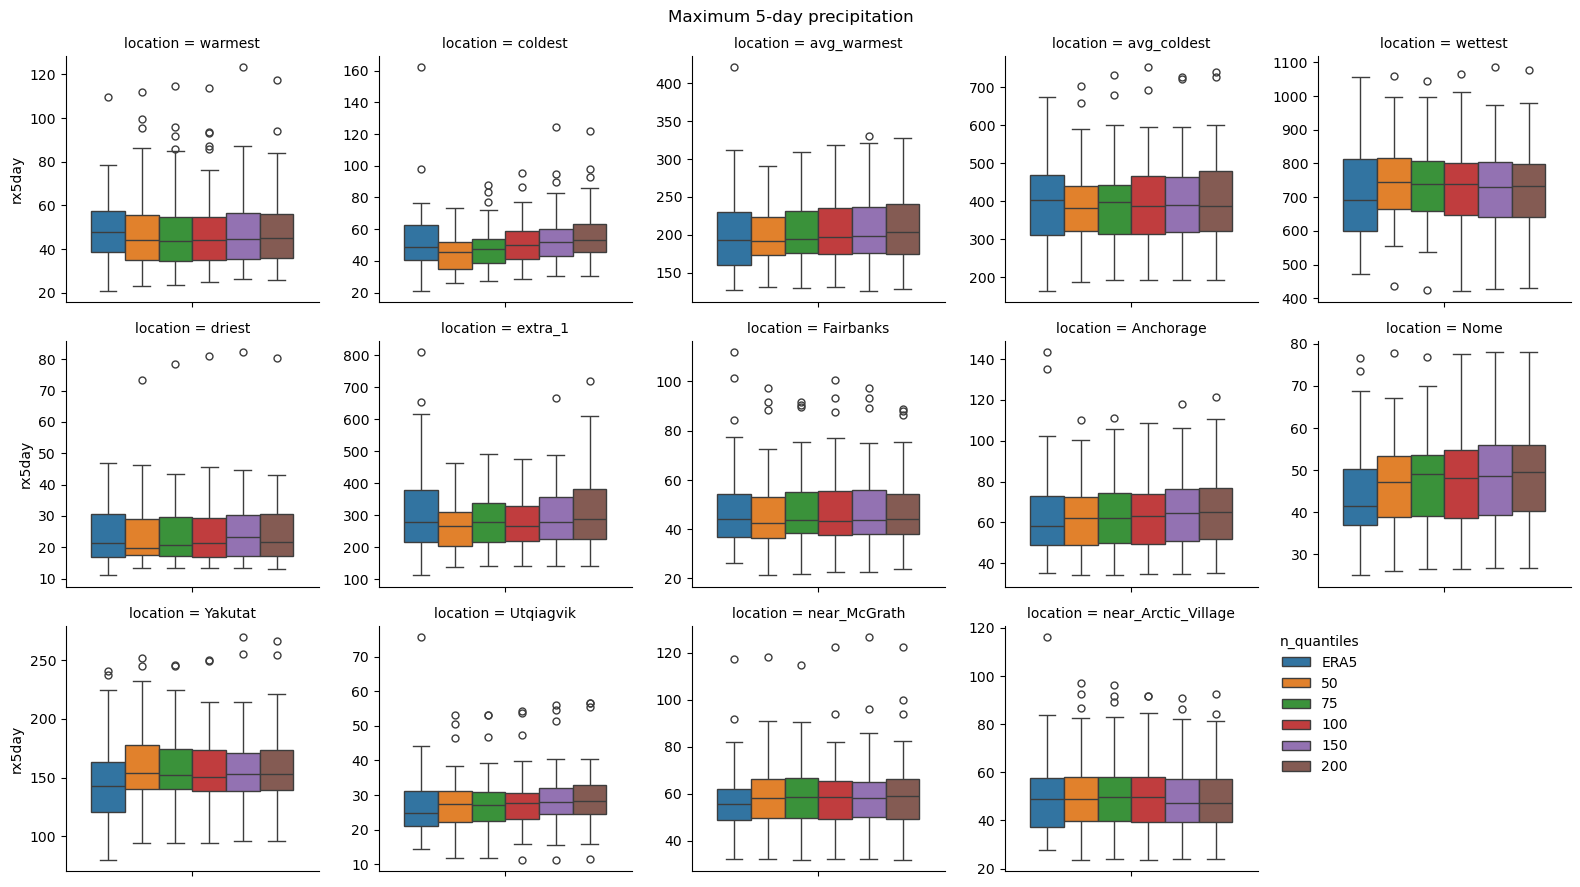

In [15]:
indicator_ds = results[model][var_id]["qdm_quantiles"]["indicators"]["historical"]
for indicator in indicator_ds.data_vars:
    baeda.indicator_boxplot_by_location(indicator_ds, indicator, hue="n_quantiles")